# Face Detection, Landmarks & Recognition

***Author :*** *Akshay Sehgal, www.akshaysehgal.com*

1. Functional implementation of face detection, landmark detection and face recognition for single frame
2. In-notebook testing using cv2 wrapper cvloop
3. Drawing using cv2.draw
4. Comparison of dlib (face_recognition) vs haar_cascade (cv2.CascadeClassifier)

In [226]:
import cv2
from cvloop import cvloop
import face_recognition
import numpy as np
import matplotlib.pyplot as plt

### 1. Face detection (dlib)

In [227]:
def face_detect(frame):
    face_locations = face_recognition.face_locations(frame)
    
    for (t,r,b,l) in face_locations:
        frame = cv2.rectangle(frame, (l, t), (r, b), (0,0,255), 2)
    return frame

<IPython.core.display.Javascript object>


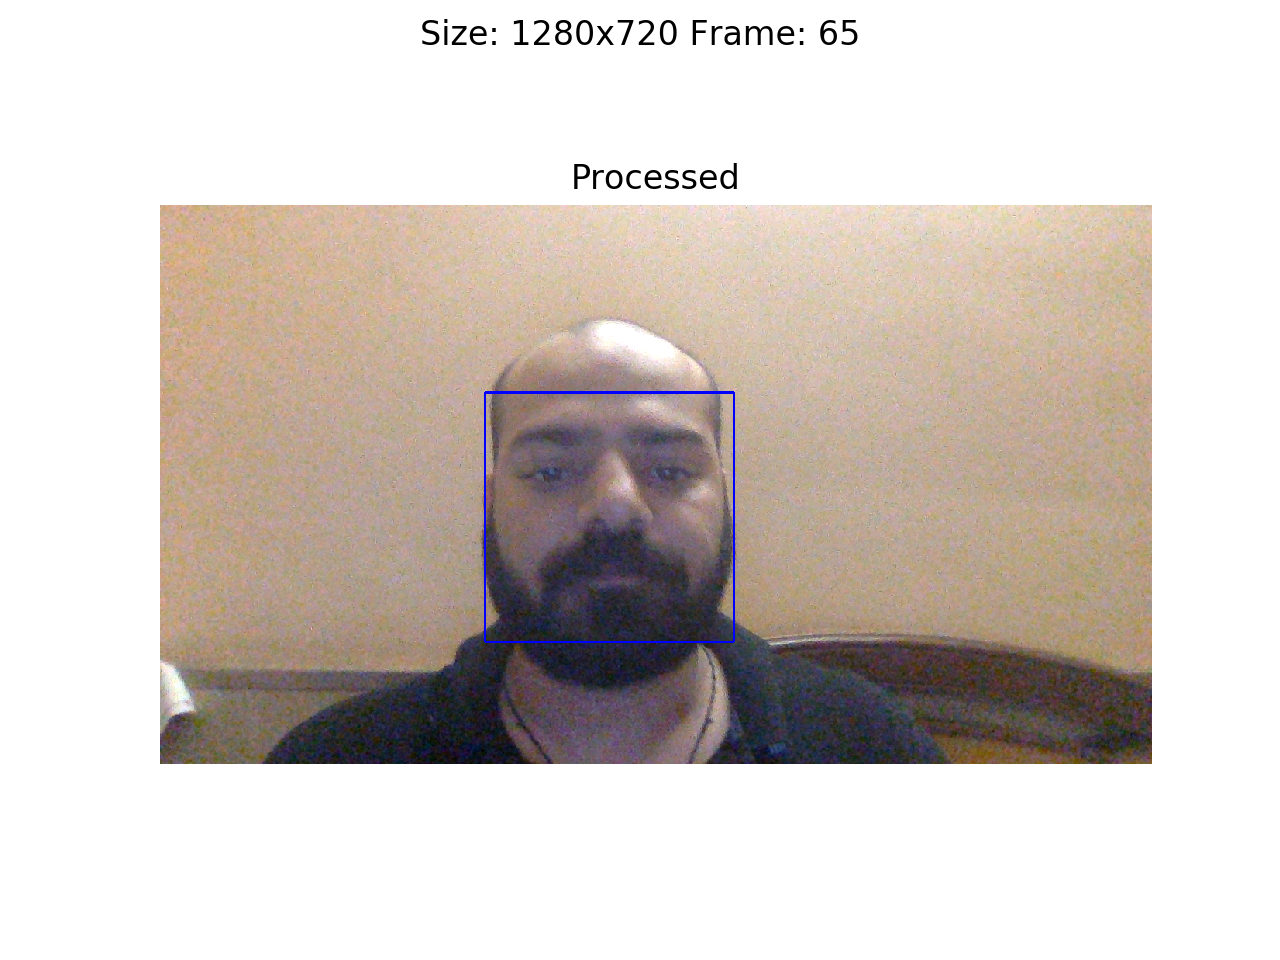

In [221]:
#Using webcam
cvloop(function=face_detect)

<IPython.core.display.Javascript object>


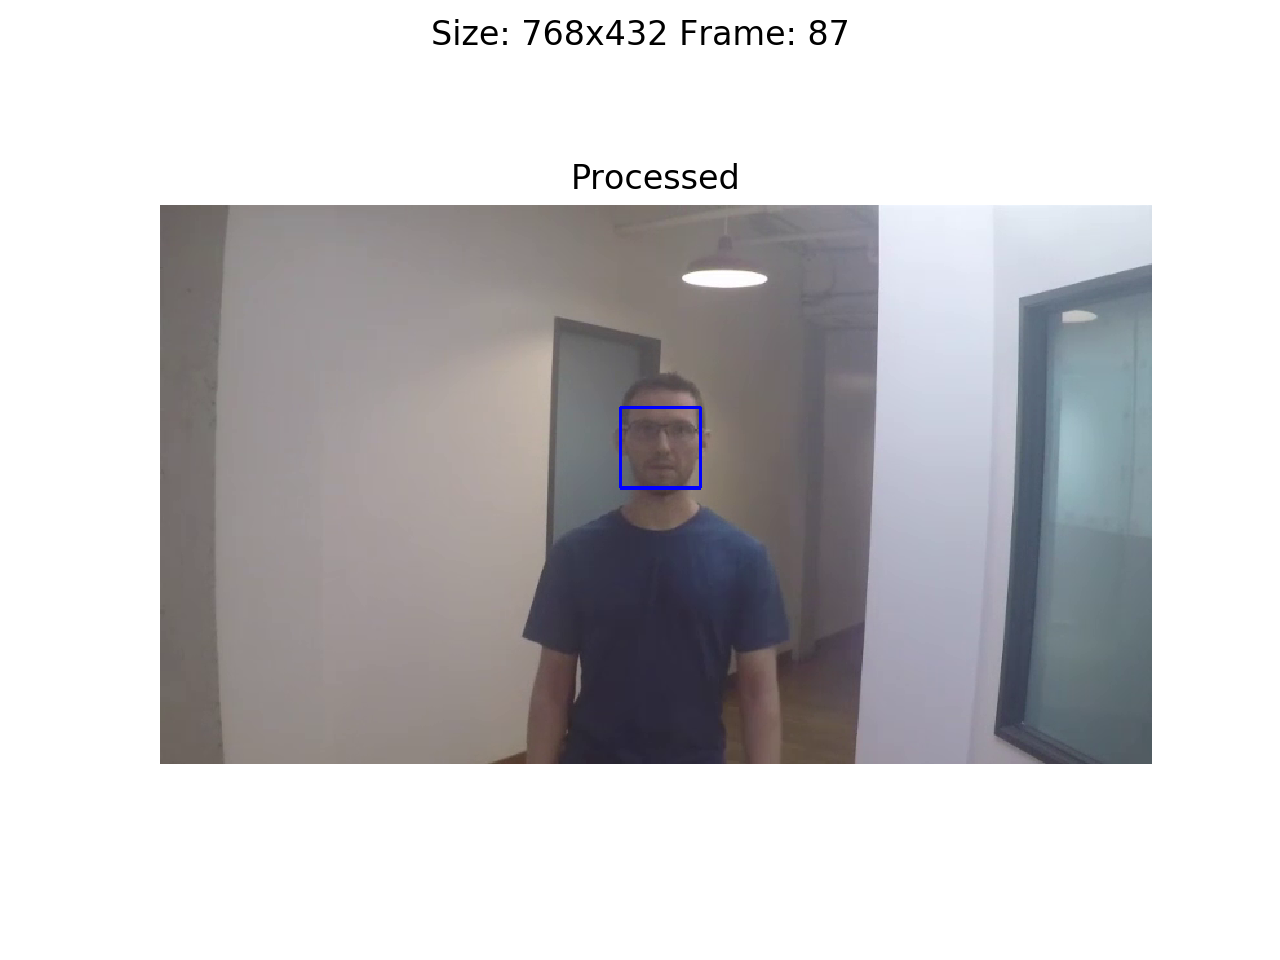

In [228]:
#Using recorded video
cvloop('sample_videos/walk.mp4', function=face_detect)

### 2. Face landmarks (dlib)

In [225]:
def face_landmarks(frame):
    face_landmarks = face_recognition.face_landmarks(frame)
    
    for i in face_landmarks:
        for j in list(i.values()):
            pts = np.array(j, np.int32)
            frame = cv2.polylines(frame, [pts], False, (0,255,255), 3)
            
    return frame

<IPython.core.display.Javascript object>


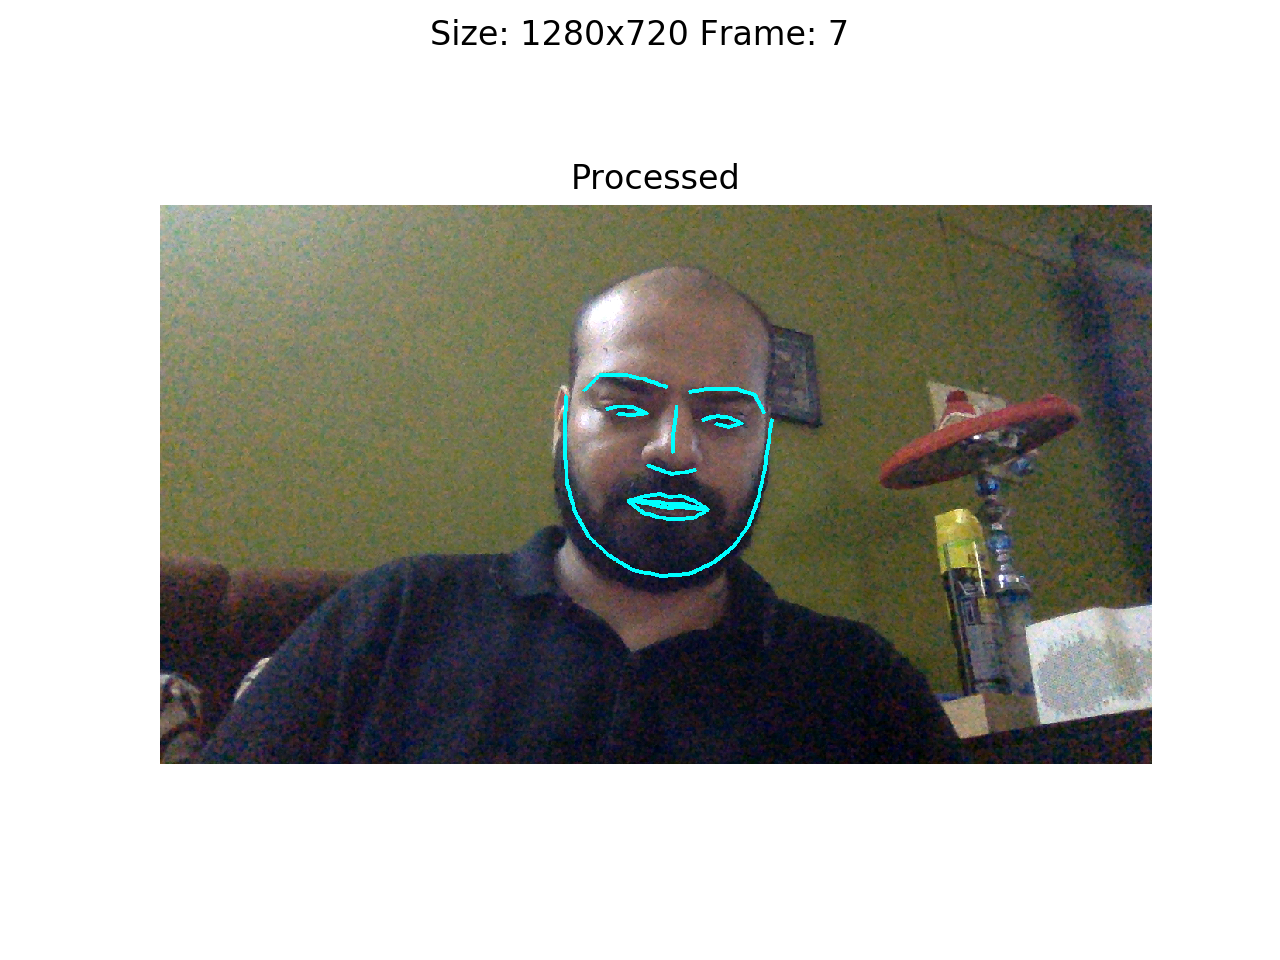

In [155]:
#Using webcam
cvloop(function=face_landmarks)

<IPython.core.display.Javascript object>


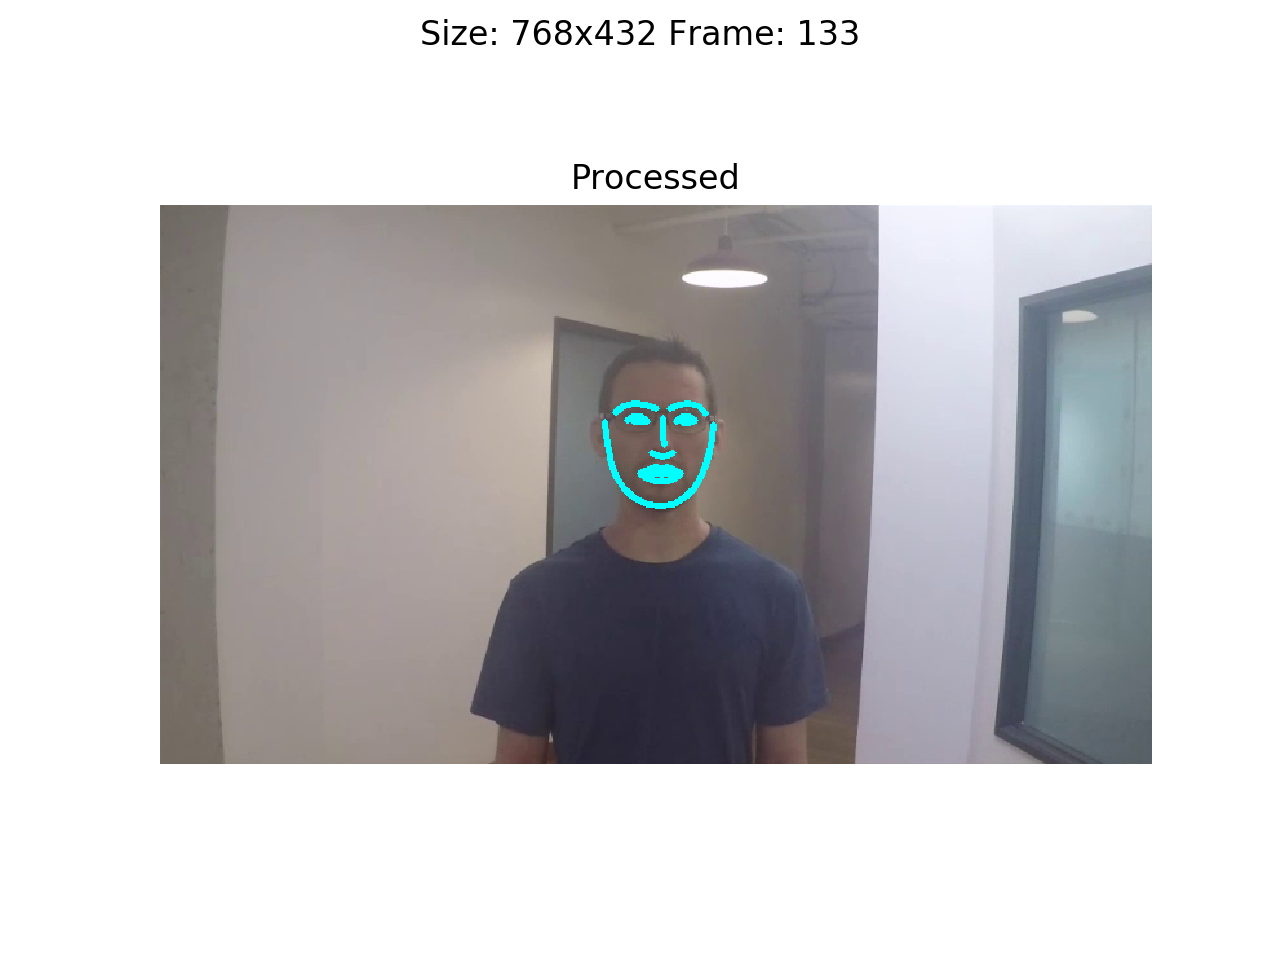

In [229]:
#Using recorded video
cvloop('sample_videos/walk.mp4', function=face_landmarks)

### 3. Face recognition (dlib)

In [156]:
known_image = face_recognition.load_image_file("sample_images/akshay.jpg")
known_encoding = face_recognition.face_encodings(known_image)[0]

In [174]:
def face_recog(frame):

    #Compare encodings
    unknown_encoding = face_recognition.face_encodings(frame)[0]
    results = face_recognition.compare_faces([known_encoding], unknown_encoding)
    
    if results[0] == True:
        name = 'Akshay'
    else:
        name = 'Unknown'
    
    frame = cv2.putText(frame, name,(10,80), cv2.FONT_HERSHEY_SIMPLEX, 3, 255, thickness=2)
    return frame

<IPython.core.display.Javascript object>


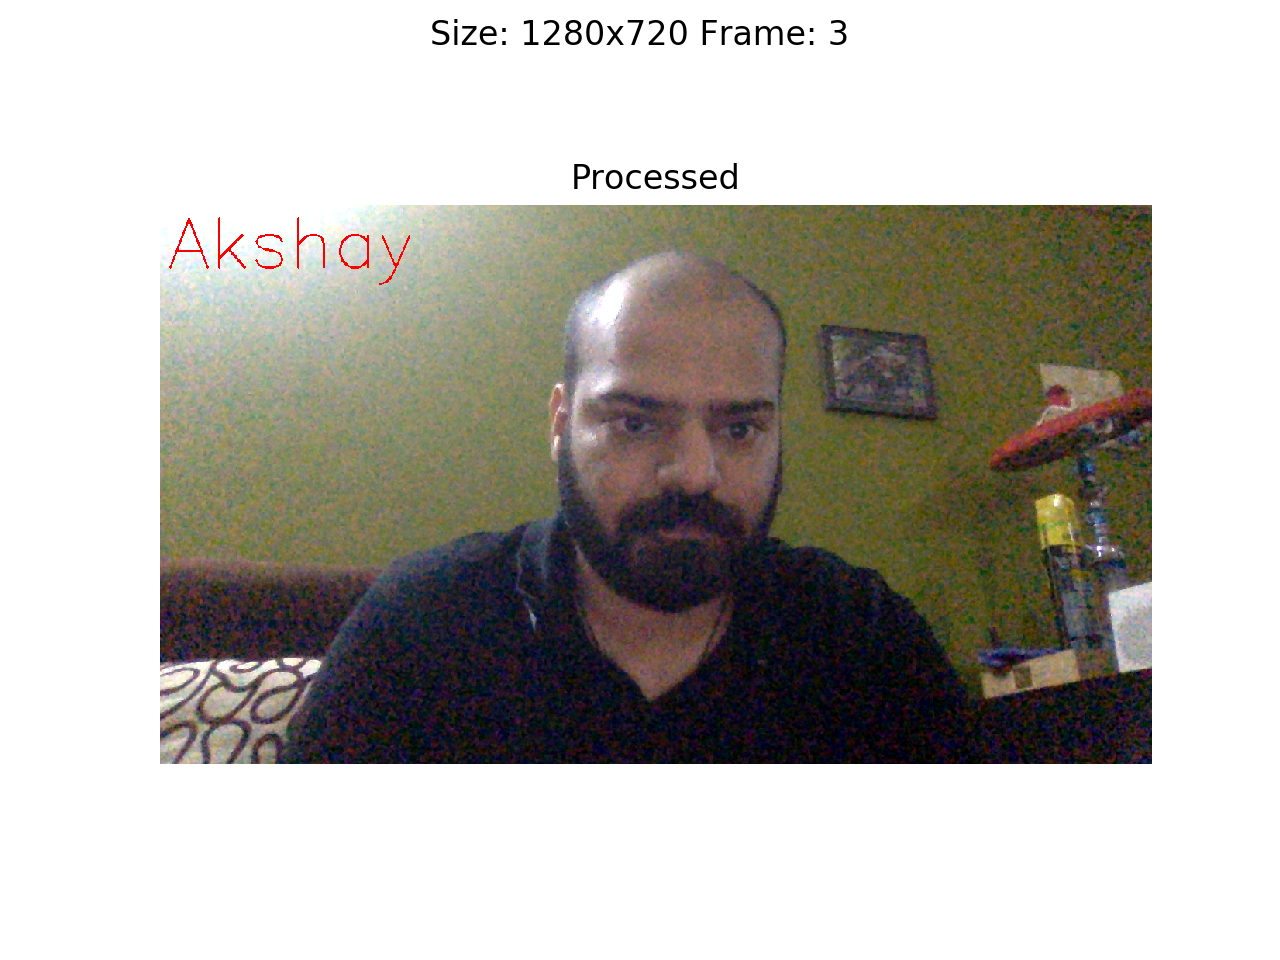

In [175]:
#Using webcam
cvloop(function=face_recog)

<IPython.core.display.Javascript object>


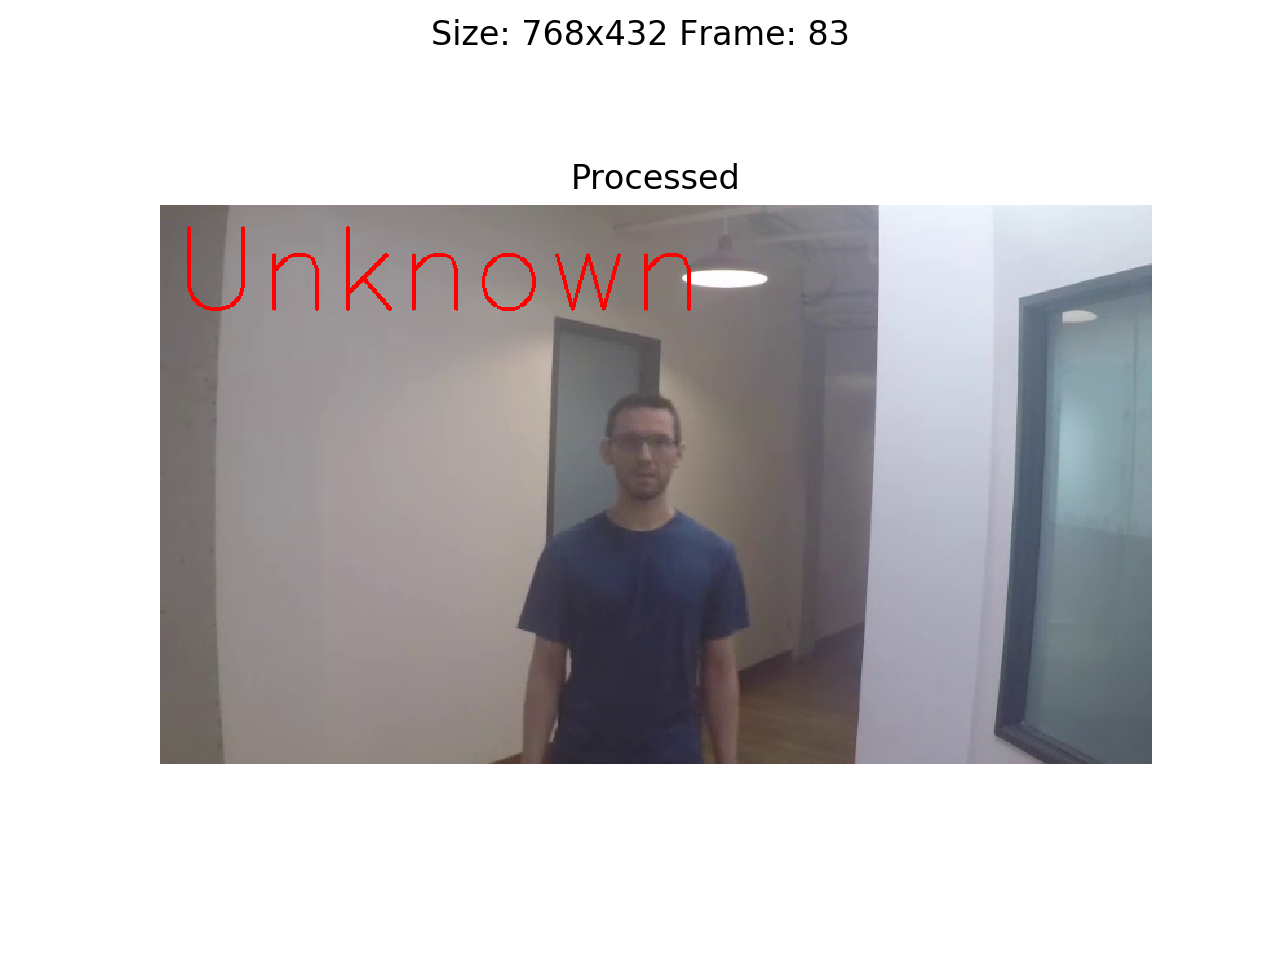

In [176]:
#Using recorded video
cvloop('sample_videos/walk.mp4', function=face_recog)

### 4. Face detection (Haar cascade)

In [209]:
haar_cascade_face = cv2.CascadeClassifier('haar_files/haarcascade_frontalface_alt2.xml')

In [216]:
def face_detect_haar(frame):
    
    #Face detection (returns list of tuples where a face is detected)
    faces_rects = haar_cascade_face.detectMultiScale(frame)
    
    #Draw a rectangle after up-scaling coordinated
    for (x,y,w,h) in faces_rects:
        frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255), 2)
    return frame

<IPython.core.display.Javascript object>


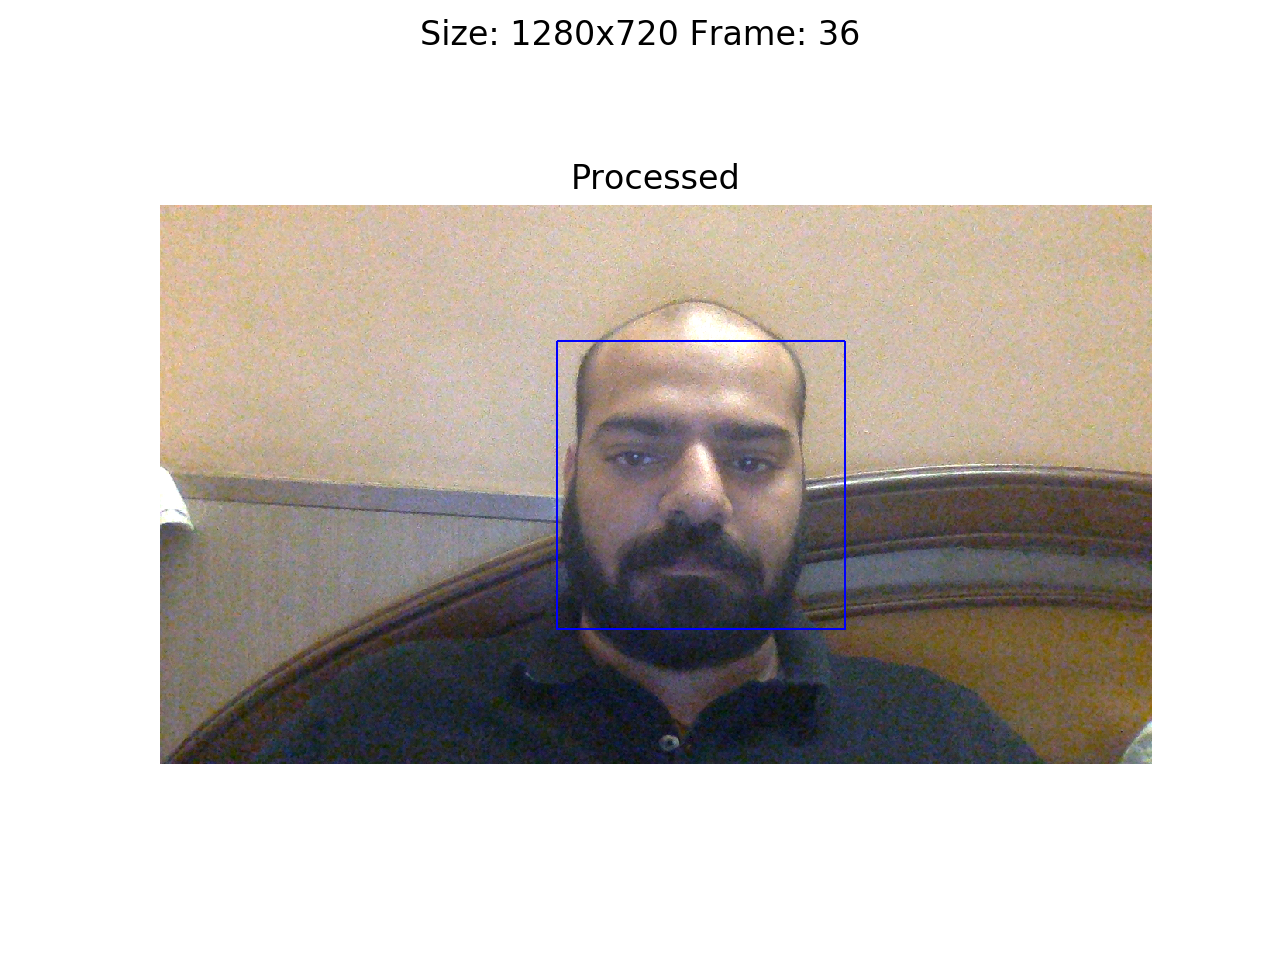

In [222]:
#Using webcam
cvloop(function=face_detect_haar)

<IPython.core.display.Javascript object>


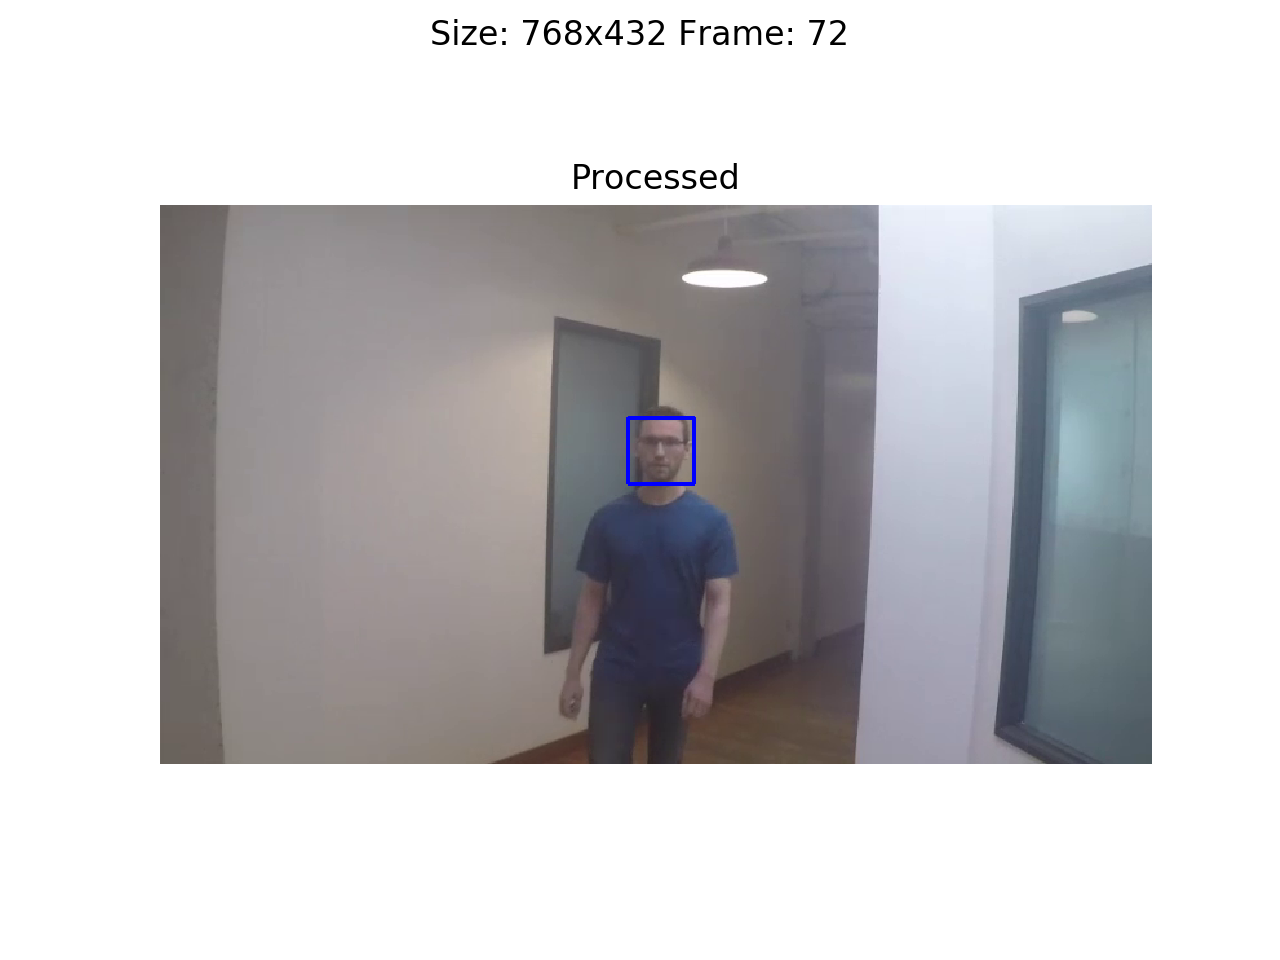

In [231]:
#Using recorded video
cvloop('sample_videos/walk.mp4', function=face_detect_haar)

## Observations

1. Dlib is extremely powerful for face detection, recognition and landmarks but slower than haar face detection
2. Haar has a lot of false detections and not very flexible with tilting and rotations of face
3. Prefer haar cascade for real time detection, dlib for recorded